In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'c:\Users\AVANISH SINGH\OneDrive\Desktop\Excel_machine\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])
# df['smoker'] = le.fit_transform(df['smoker'])

In [4]:
x = df.drop(['region', 'charges'], axis=1) # Drop 'region' and 'charges' columns from the dataset
y = df['charges'] # Select the 'charges' column as the target variable


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train_scaledm = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [8]:
model = KNeighborsRegressor()

In [9]:
model.fit(x_train_scaledm, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = model.predict(x_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 26113897.7388678
R² Score: 0.8317931651489754


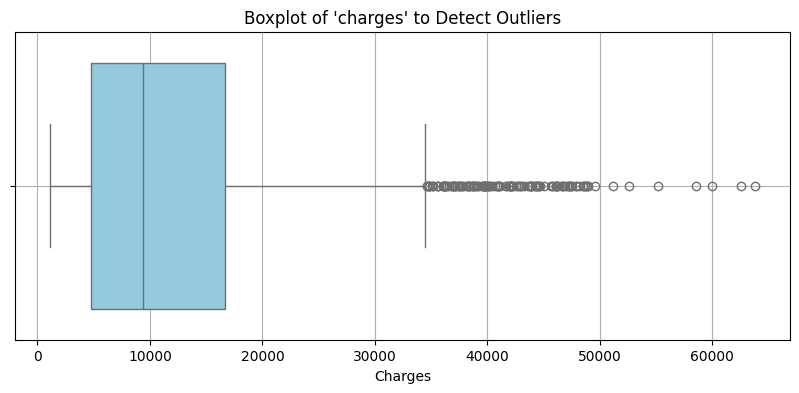

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['charges'], color='skyblue')
plt.title("Boxplot of 'charges' to Detect Outliers")
plt.xlabel("Charges")
plt.grid(True)
plt.show()
